# Introducción a [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)
Segunda parte

In [ ]:
! gdown 14A6BTIPUxSBW4ZWTqno7FRkcUqXSSNDV

Downloading...
From: https://drive.google.com/uc?id=14A6BTIPUxSBW4ZWTqno7FRkcUqXSSNDV
To: /content/trips_2023_sample149.csv
100% 43.5k/43.5k [00:00<00:00, 55.6MB/s]


In [ ]:
import pandas as pd

## Tipos de datos la revancha

En la clase anteriores vimos algunos de los tipos básicos con los que se pueden trabajar en python con [Pandas](https://pandas.pydata.org/), continuaremos a partir de eso.

Trabajemos ahora con los siguientes datos

In [ ]:
df_tipos = pd.read_csv("/content/trips_2023_sample149.csv")

Observemos un poco su composición para ver que es lo que de debería contener y los tipos que se le asignaron a los campos de manera por defecto

In [ ]:
df_tipos.head()

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
0,1,17910696BAEcobici,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE
2,3,17255670BAEcobici,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE
3,4,17996972BAEcobici,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE


In [ ]:
df_tipos.dtypes

,0
Unnamed: 0,int64
Id_recorrido,object
duracion_recorrido,int64
fecha_origen_recorrido,object
id_estacion_origen,object
nombre_estacion_origen,object
direccion_estacion_origen,object
long_estacion_origen,float64
lat_estacion_origen,float64
fecha_destino_recorrido,object


In [ ]:
# Que es lo que se está haciendo?
df_tipos['duracion_recorrido'] = df_tipos['duracion_recorrido'].str.replace(',', '').astype(int)


print(df_tipos.dtypes)

AttributeError: Can only use .str accessor with string values!

De un primer vistazo vemos que una cuantas columnas tienen como tipo asociado el `object` pero viendo los datos podemos tener intuición de que son algo más concreto. La idea es poder remplazar al mayor cantidad por su tipo más adecuado(de ser posible).

Otra observación es que hay una columna que está en los datos *sin nombre* (Unnamed) y que a priori no aporta datos nuevos. Está en nosotros ver si debemos modificar, eliminarla o nombrarla.

### Fechas

Primero atacaremos las columnas llamadas **fecha_origen_recorrido** y **fecha_destino_recorrido**. Tiene pinta de tener algo en común y es que ¡*son fechas*!

Ya que conocemos su verdadera identidad estaría bueno transformar la columna a tu **tipo** deseado que es el `datetime64`

In [ ]:
# Queremos remplazar todos los valores de la coluna 'fecha_origen_recorrido'
# por la tranformación de la comlumna 'fecha_origen_recorrido' a fechas
df_tipos['fecha_origen_recorrido'] = pd.to_datetime(df_tipos['fecha_origen_recorrido'])

print(df_tipos.dtypes)

Unnamed: 0                             int64
Id_recorrido                          object
duracion_recorrido                     int64
fecha_origen_recorrido        datetime64[ns]
id_estacion_origen                    object
nombre_estacion_origen                object
direccion_estacion_origen             object
long_estacion_origen                 float64
lat_estacion_origen                  float64
fecha_destino_recorrido               object
id_estacion_destino                   object
nombre_estacion_destino               object
direccion_estacion_destino            object
long_estacion_destino                float64
lat_estacion_destino                 float64
id_usuario                            object
modelo_bicicleta                      object
género                                object
dtype: object


In [ ]:
df_tipos['fecha_destino_recorrido'] = pd.to_datetime(df_tipos["fecha_destino_recorrido"])

In [ ]:
df_tipos.dtypes

,0
Unnamed: 0,int64
Id_recorrido,object
duracion_recorrido,int64
fecha_origen_recorrido,datetime64[ns]
id_estacion_origen,object
nombre_estacion_origen,object
direccion_estacion_origen,object
long_estacion_origen,float64
lat_estacion_origen,float64
fecha_destino_recorrido,object


Otra cosa que nos puede resultar interesante son las brechas de tiempo, en estos datos viene dada, pero a modo de practica calculamos de una forma bastante intuitiva como la diferencia entre el horario de partida y llegada. El resultado puede insertarse en una nueva columna llamada duración recorrido.

In [ ]:
df_tipos["duracion_recorrido"] = df_tipos["fecha_destino_recorrido"] - df_tipos["fecha_origen_recorrido"]

TypeError: cannot subtract DatetimeArray from ndarray

In [ ]:
df_tipos

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
0,1,17910696BAEcobici,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE
2,3,17255670BAEcobici,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE
3,4,17996972BAEcobici,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,17148882BAEcobici,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,222BAEcobici,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE
145,146,17207433BAEcobici,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,59BAEcobici,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE
146,147,17596415BAEcobici,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,223BAEcobici,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE
147,148,17243523BAEcobici,467,2023-02-15 01:37:46,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2023-02-15 01:45:33,82BAEcobici,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,373020BAEcobici,ICONIC,MALE


In [ ]:
df_tipos["duracion_recorrido"].mean()

np.float64(1097.8724832214766)

### Categóricos

 Es un tipo especial que permite almacenar datos de texto o numéricos que tienen un número limitado de valores únicos (categorías). Este tipo optimiza el uso de memoria y permite hacer comparaciones de categorías más eficientemente. En el caso de nuestros datos hay un caso particular que resalta por esto (redoble de tambores) es la columna `género`, transformándola.

In [ ]:
df_tipos['género'] = df_tipos['género'].astype('category')

In [ ]:
df_tipos.dtypes

,0
Unnamed: 0,int64
Id_recorrido,object
duracion_recorrido,int64
fecha_origen_recorrido,datetime64[ns]
id_estacion_origen,object
nombre_estacion_origen,object
direccion_estacion_origen,object
long_estacion_origen,float64
lat_estacion_origen,float64
fecha_destino_recorrido,object


In [ ]:
df_tipos

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
0,1,17910696BAEcobici,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE
2,3,17255670BAEcobici,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE
3,4,17996972BAEcobici,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,17148882BAEcobici,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,222BAEcobici,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE
145,146,17207433BAEcobici,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,59BAEcobici,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE
146,147,17596415BAEcobici,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,223BAEcobici,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE
147,148,17243523BAEcobici,467,2023-02-15 01:37:46,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2023-02-15 01:45:33,82BAEcobici,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,373020BAEcobici,ICONIC,MALE


Este caso fue sencillo porque la variable es claramente categórica. Hay casos que nos interesa transformar rangos numéricos en categorías, como puede ser para separar en *bajos*, *medios* y *altos*. En estos casos tenemos dos funciones

+ `pd.cut()` : Divide los datos en intervalos específicos.
+ `pd.qcut()` : Divide los datos en intervalos de *igual frecuencia*.

Acá tenemos un pequeño ejemplo de lo que estoy hablando sobre un dataset auxiliar:

In [ ]:
# Crear un DataFrame con valores numéricos
df = pd.DataFrame({'edad': [15, 20, 25, 30, 35, 40, 45, 50]})

# Categorizar la columna 'edad' en rangos
df['grupo_edad'] = pd.cut(df['edad'], bins=[0, 18, 35, 50], labels=['joven', 'adulto', 'mayor'])

print(df)
print(df.dtypes)

   edad grupo_edad
0    15      joven
1    20     adulto
2    25     adulto
3    30     adulto
4    35     adulto
5    40      mayor
6    45      mayor
7    50      mayor
edad             int64
grupo_edad    category
dtype: object


entre las ventajas de las variables categóricas están el **uso eficiente de memoria**, las categorías ocupan menos espacio en memoria, especialmente si tienes muchas repeticiones de valores, y **optimización en cálculos**, Al realizar operaciones, pandas usa la representación de categorías, lo cual es más rápido para algunos tipos de análisis, como agrupaciones y conteos. Usar variables categóricas es una buena práctica para optimizar la eficiencia de tu análisis, especialmente en grandes conjuntos de datos.

En el dataset que nos acompaña desde el principio hay otra variable categórica ¿sabrían identificarlas y convertirlas?

In [ ]:
df_tipos.modelo_bicicleta=df_tipos.modelo_bicicleta.astype("category")

In [ ]:
df_tipos.dtypes

,0
Unnamed: 0,int64
Id_recorrido,object
duracion_recorrido,timedelta64[ns]
fecha_origen_recorrido,datetime64[ns]
id_estacion_origen,object
nombre_estacion_origen,object
direccion_estacion_origen,object
long_estacion_origen,float64
lat_estacion_origen,float64
fecha_destino_recorrido,datetime64[ns]


### Datos georreferenciados

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Convertir a una serie de puntos geográficos
puntos_estacion_destino = [Point(xy) for xy in zip(df_tipos['long_estacion_destino'], df_tipos['lat_estacion_destino'])]

df_tipos["puntos_estacion_destino"] = puntos_estacion_destino
df_tipos.dtypes


,0
Unnamed: 0,int64
Id_recorrido,object
duracion_recorrido,int64
fecha_origen_recorrido,datetime64[ns]
id_estacion_origen,object
nombre_estacion_origen,object
direccion_estacion_origen,object
long_estacion_origen,float64
lat_estacion_origen,float64
fecha_destino_recorrido,object


In [ ]:
# Solución correcta:
df_tipos['puntos_destino'] = df_tipos.apply(lambda row: Point(row['long_estacion_destino'], row['lat_estacion_destino']), axis=1)

df_tipos = gpd.GeoDataFrame(df_tipos)
df_tipos

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,puntos_estacion_destino,puntos_destino
0,1,17910696BAEcobici,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE,POINT (-58.469813 -34.564122),POINT (-58.469813 -34.564122)
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE,POINT (-58.3681738028771 -34.611102140682),POINT (-58.3681738028771 -34.611102140682)
2,3,17255670BAEcobici,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE,POINT (-58.449379 -34.633528),POINT (-58.449379 -34.633528)
3,4,17996972BAEcobici,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE,POINT (-58.4772094734465 -34.6162121414803),POINT (-58.4772094734465 -34.6162121414803)
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE,POINT (-58.426387 -34.577424),POINT (-58.426387 -34.577424)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,17148882BAEcobici,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,222BAEcobici,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE,POINT (-58.4212684112399 -34.5758796846019),POINT (-58.4212684112399 -34.5758796846019)
145,146,17207433BAEcobici,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,59BAEcobici,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE,POINT (-58.380565 -34.617654),POINT (-58.380565 -34.617654)
146,147,17596415BAEcobici,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,223BAEcobici,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE,POINT (-58.424853 -34.6234),POINT (-58.424853 -34.6234)
147,148,17243523BAEcobici,467,2023-02-15 01:37:46,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2023-02-15 01:45:33,82BAEcobici,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,373020BAEcobici,ICONIC,MALE,POINT (-58.4263947 -34.6078917),POINT (-58.4263947 -34.6078917)


In [ ]:
df_tipos['puntos_origen'] = df_tipos.apply(lambda row: Point(row['long_estacion_origen'], row['lat_estacion_origen']), axis=1)


### Strings

Normalmente cuando cargamos datos muchos va a ser texto. En la clase pasada esquivamos el primer problema que era el del encoding, ahora vamos con un problema relevante cuando tenemos MUCHOS datos y es el manejo en memoria. Pandas cuando carga caracteres lo hace en forma de un tipo llamado `objeto` que es el manejo de string que estamos acostumbrados en python.

Ahora podemos cambiarlo a un formato más especifico marcando la columna como `string` de esta forma pandas logrará mejorar el mano



In [ ]:
df_tipos["nombre_estacion_origen"] = df_tipos["nombre_estacion_origen"].astype("string")

In [ ]:
df_tipos["nombre_estacion_origen"]

,nombre_estacion_origen
0,249 - Balbín
1,061 - Ministerio de Economia
2,222 - SIMON BOLIVAR
3,223 - GAINZA
4,065 - Julián Álvarez
...,...
144,290 - Club Excursionistas
145,010 - Madero UCA
146,131- HOSPITAL DE CLÍNICAS
147,054 - Acuña de Figueroa


In [ ]:
df_tipos['nombre_estacion_origen'] = df_tipos['nombre_estacion_origen'].astype('string')


In [ ]:
# Repetir con las columnas que faltan

#### regex

Los regex o expresiones regulares son patrones de **texto** que permiten buscar y manipular cadenas de caracteres de manera flexible y poderosa. Funcionan como un lenguaje de mini-sintaxis para especificar combinaciones de caracteres que quieres encontrar o transformar en un texto. Son muy útiles para limpiar, validar o extraer datos de textos en estructuras complejas o cuando los formatos de los datos pueden variar.

Por ejemplo, en pandas puedes usarlas para buscar patrones específicos dentro de las columnas de strings. Algunas operaciones comunes con regex incluyen buscar palabras o caracteres específicos, validar formatos (como correos electrónicos, números de teléfono, etc.), extraer partes de un texto (como números o fechas dentro de una cadena), Reemplazar o eliminar patrones específicos.

Acá dejo un pequeño machete:

| operador | Descripción |
|:--------:|:------------|
| .        | Cualquier carácter, excepto una nueva línea|
| ^        | Indica el inicio de una línea, solo al principio de la cadena|
| $        | Indica el final de una línea|
| *        | Coincide con 0 o más repeticiones del carácter anterior|
| +        | Coincide con 1 o más repeticiones del carácter anterior|
| ?        | Coincide con 0 o 1 repetición del carácter anterior|
| \{n}     | Coincide exactamente con n repeticiones del carácter anterior|
| \[abc]   | Cualquiera de los caracteres entre los corchetes.|
| \[^abc]  | cualquier carácter excepto los especificados |
| ( )      | Define un grupo para agrupar partes del patrón o capturar subcadenas|
| \d       | Cualquier dígito|
| \D       | Cualquier carácter que no sea un dígito|
| \w       | Cualquier carácter alfanumérico|
| \W       | Cualquier carácter no alfanumérico|
| \s       | Espacios en blanco|

Un ejemplo de uso dentro de nuestros datos es ver que si todas las id_recorrido están bien formadas

In [ ]:
df_tipos.Id_recorrido

,Id_recorrido
0,17910696BAEcobici
1,17600256BAEcobici
2,17255670BAEcobici
3,17996972BAEcobici
4,17148836BAEcobici
...,...
144,17148882BAEcobici
145,17207433BAEcobici
146,17596415BAEcobici
147,17243523BAEcobici


In [ ]:
if df_tipos['Id_recorrido'].str.contains(r'^\d*BAEcobici$').count() == df_tipos['Id_recorrido'].count():
  print("Todos los datos tienen sus ids bien")


Todos los datos tienen sus ids bien


In [ ]:
df_tipos

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,...,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,puntos_estacion_destino,puntos_destino,puntos_origen
0,1,17910696BAEcobici,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,...,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE,POINT (-58.469813 -34.564122),POINT (-58.469813 -34.564122),POINT (-58.46559 -34.56149)
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,...,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE,POINT (-58.3681738028771 -34.611102140682),POINT (-58.3681738028771 -34.611102140682),POINT (-58.37072 -34.60894)
2,3,17255670BAEcobici,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,...,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE,POINT (-58.449379 -34.633528),POINT (-58.449379 -34.633528),POINT (-58.44938 -34.63353)
3,4,17996972BAEcobici,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,...,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE,POINT (-58.4772094734465 -34.6162121414803),POINT (-58.4772094734465 -34.6162121414803),POINT (-58.44675 -34.61676)
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,...,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE,POINT (-58.426387 -34.577424),POINT (-58.426387 -34.577424),POINT (-58.41579 -34.58731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,17148882BAEcobici,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,...,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE,POINT (-58.4212684112399 -34.5758796846019),POINT (-58.4212684112399 -34.5758796846019),POINT (-58.44418 -34.55915)
145,146,17207433BAEcobici,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,...,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE,POINT (-58.380565 -34.617654),POINT (-58.380565 -34.617654),POINT (-58.36567 -34.61649)
146,147,17596415BAEcobici,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,...,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE,POINT (-58.424853 -34.6234),POINT (-58.424853 -34.6234),POINT (-58.39902 -34.5984)
147,148,17243523BAEcobici,467,2023-02-15 01:37:46,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2023-02-15 01:45:33,...,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,373020BAEcobici,ICONIC,MALE,POINT (-58.4263947 -34.6078917),POINT (-58.4263947 -34.6078917),POINT (-58.42207 -34.59821)


## Estadisticas resumen

La estadística resumen o estadísticas descriptivas se refiere a un conjunto de técnicas y medidas que se utilizan para resumir, organizar y describir un conjunto de datos. El objetivo principal de la estadística resumen es proporcionar una visión general de los datos para facilitar su interpretación y análisis sin necesidad de examinar cada valor individualmente.

Hablaremos de las más mundanas, el resto quedan para materias posteriores donde se posean otro tipo de herramientas matemáticas y de estadistica.

+ **Media** (promedio): Es la suma de todos los valores dividida por el número total de valores. $$Media = {\sum_{i = 0}^nx_i\over{n}}$$

+ **Mediana**: Es el valor que se encuentra en el medio de los datos cuando estos están ordenados de menor a mayor. Si el número de observaciones es impar, la mediana es el valor central. Si es par, es el promedio de los dos valores centrales.

+ **Moda**: Es el valor o los valores que ocurren con mayor frecuencia en el conjunto de datos. Puede haber más de una moda (bimodal, multimodal), o ninguna.

+ Los percentiles: Dividen los datos en 100 partes iguales. El percentil 50 es la mediana, el percentil 25 es el primer cuartil (Q1), y el percentil 75 es el tercer cuartil (Q3). Estas medidas nos sirven para separar los datos por cantidades. Derivados de estas medidas surge **rango intercuartil** (IQR) que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Mide la dispersión de los datos en la parte central.

Veamos como obtener estas medidas

In [ ]:
df_tipos['duracion_recorrido'].mean(), df_tipos['duracion_recorrido'].median(), df_tipos['duracion_recorrido'].quantile(0.9)

(np.float64(1097.8724832214766), 892.0, np.float64(1830.4000000000003))

In [ ]:
df_tipos['duracion_recorrido'].describe()

,duracion_recorrido
count,149.000000
mean,1097.872483
std,1069.357614
min,150.000000
25%,543.000000
50%,892.000000
75%,1265.000000
max,10477.000000


<Axes: xlabel='id_estacion_origen'>

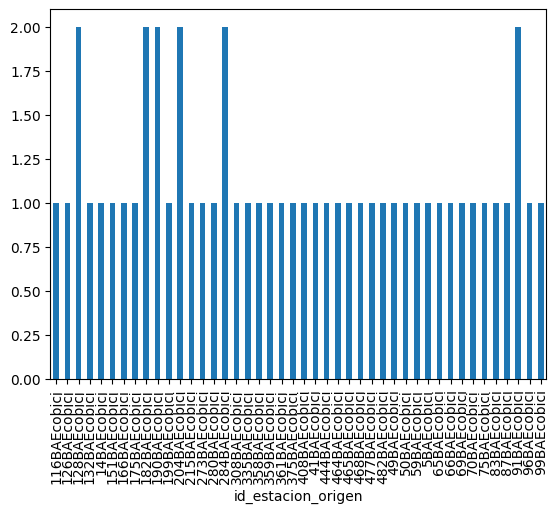

In [ ]:
df_tipos.head(n=50).groupby('id_estacion_origen').count()['Id_recorrido'].plot.bar()

<Axes: >

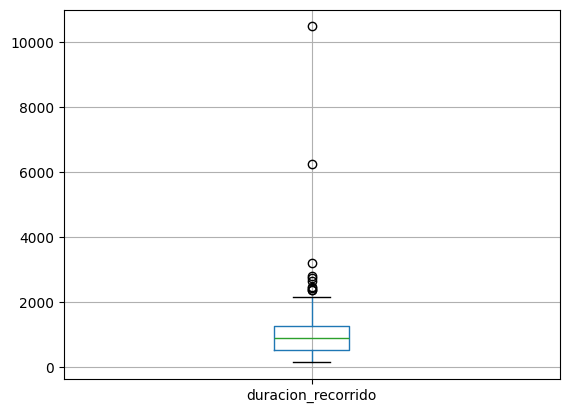

In [ ]:
df_tipos.boxplot("duracion_recorrido")

In [ ]:
df_tipos.groupby('género').count()['Id_recorrido'].plot.pie()

## Índice

los índices son etiquetas que identifican las filas de un DataFrame o Series. Tenemos que pensar en ellos como los *rótulos* de cada fila, similar a las filas numeradas de una tabla o a los encabezados en una hoja de cálculo. Los índices permiten acceder, ordenar y manipular los datos de manera más eficiente y son útiles para realizar búsquedas y filtrados. Además, muchas veces nos sirven como punto de unión entre es datos y el mundo real donde fueron tomados.

Características clave de los índices
+ *Identificación única*: Cada índice identifica una fila específica, permitiendo acceder directamente a sus datos.

+ *Flexibilidad en los valores*: Los índices pueden ser números, texto (strings), fechas, o cualquier tipo de dato único que identifique una fila.

+ *Manipulación de datos*: Los índices se usan para ordenar, agrupar, y combinar datos entre DataFrames de manera eficiente.

In [ ]:
df_tipos

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,...,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,puntos_estacion_destino,puntos_destino,puntos_origen
0,1,17910696BAEcobici,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,...,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE,POINT (-58.469813 -34.564122),POINT (-58.469813 -34.564122),POINT (-58.46559 -34.56149)
1,2,17600256BAEcobici,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,...,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE,POINT (-58.3681738028771 -34.611102140682),POINT (-58.3681738028771 -34.611102140682),POINT (-58.37072 -34.60894)
2,3,17255670BAEcobici,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,...,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE,POINT (-58.449379 -34.633528),POINT (-58.449379 -34.633528),POINT (-58.44938 -34.63353)
3,4,17996972BAEcobici,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,...,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE,POINT (-58.4772094734465 -34.6162121414803),POINT (-58.4772094734465 -34.6162121414803),POINT (-58.44675 -34.61676)
4,5,17148836BAEcobici,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,...,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE,POINT (-58.426387 -34.577424),POINT (-58.426387 -34.577424),POINT (-58.41579 -34.58731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,17148882BAEcobici,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,...,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE,POINT (-58.4212684112399 -34.5758796846019),POINT (-58.4212684112399 -34.5758796846019),POINT (-58.44418 -34.55915)
145,146,17207433BAEcobici,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,...,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE,POINT (-58.380565 -34.617654),POINT (-58.380565 -34.617654),POINT (-58.36567 -34.61649)
146,147,17596415BAEcobici,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,...,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE,POINT (-58.424853 -34.6234),POINT (-58.424853 -34.6234),POINT (-58.39902 -34.5984)
147,148,17243523BAEcobici,467,2023-02-15 01:37:46,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2023-02-15 01:45:33,...,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,373020BAEcobici,ICONIC,MALE,POINT (-58.4263947 -34.6078917),POINT (-58.4263947 -34.6078917),POINT (-58.42207 -34.59821)


In [ ]:
df_tipos.set_index("Id_recorrido")

,Unnamed: 0,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,puntos_estacion_destino,puntos_destino,puntos_origen
Id_recorrido,,,,,,,,,,,,,,,,,,,,
17910696BAEcobici,1,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,278BAEcobici,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE,POINT (-58.469813 -34.564122),POINT (-58.469813 -34.564122),POINT (-58.46559 -34.56149)
17600256BAEcobici,2,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,3BAEcobici,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE,POINT (-58.3681738028771 -34.611102140682),POINT (-58.3681738028771 -34.611102140682),POINT (-58.37072 -34.60894)
17255670BAEcobici,3,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE,POINT (-58.449379 -34.633528),POINT (-58.449379 -34.633528),POINT (-58.44938 -34.63353)
17996972BAEcobici,4,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,367BAEcobici,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE,POINT (-58.4772094734465 -34.6162121414803),POINT (-58.4772094734465 -34.6162121414803),POINT (-58.44675 -34.61676)
17148836BAEcobici,5,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,14BAEcobici,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE,POINT (-58.426387 -34.577424),POINT (-58.426387 -34.577424),POINT (-58.41579 -34.58731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17148882BAEcobici,145,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,222BAEcobici,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE,POINT (-58.4212684112399 -34.5758796846019),POINT (-58.4212684112399 -34.5758796846019),POINT (-58.44418 -34.55915)
17207433BAEcobici,146,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,59BAEcobici,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE,POINT (-58.380565 -34.617654),POINT (-58.380565 -34.617654),POINT (-58.36567 -34.61649)
17596415BAEcobici,147,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,223BAEcobici,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE,POINT (-58.424853 -34.6234),POINT (-58.424853 -34.6234),POINT (-58.39902 -34.5984)


In [ ]:
# Podemos setear una columna como la de indices de la siguiente forma
# OBS: esta operación ELIMINA la columna usada como índice, hay formas de evitar
# esto, consultar la documentación

# NO HACER ESTO!!!
df_tipos.set_index('Id_recorrido', inplace=True)

# Hacer esto
df_tipos = df_tipos.set_index('Id_recorrido')

# Se puede revertir con
df_tipos = df_tipos.reset_index()

KeyError: "None of ['Id_recorrido'] are in the columns"

In [ ]:
df_tipos.reset_index()

,Id_recorrido,Unnamed: 0,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,...,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,puntos_estacion_destino,puntos_destino,puntos_origen
0,17910696BAEcobici,1,1848,2023-04-24 10:30:10,358BAEcobici,249 - Balbín,2519 Conesa,-58.465586,-34.561486,2023-04-24 11:00:58,...,233 - MONROE,2519 Superi,-58.469813,-34.564122,861866BAEcobici,ICONIC,MALE,POINT (-58.469813 -34.564122),POINT (-58.469813 -34.564122),POINT (-58.46559 -34.56149)
1,17600256BAEcobici,2,288,2023-03-22 17:40:55,444BAEcobici,061 - Ministerio de Economia,"Balcarce e Yrigoyen, Hipolito Av.",-58.370716,-34.608936,2023-03-22 17:45:43,...,003 - ADUANA,Moreno & Azopardo,-58.368174,-34.611102,217525BAEcobici,ICONIC,FEMALE,POINT (-58.3681738028771 -34.611102140682),POINT (-58.3681738028771 -34.611102140682),POINT (-58.37072 -34.60894)
2,17255670BAEcobici,3,1103,2023-02-15 23:12:22,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,2023-02-15 23:30:45,...,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,954201BAEcobici,ICONIC,MALE,POINT (-58.449379 -34.633528),POINT (-58.449379 -34.633528),POINT (-58.44938 -34.63353)
3,17996972BAEcobici,4,1165,2023-05-03 11:00:20,273BAEcobici,223 - GAINZA,"494 Gainza, Martin De, Gral.",-58.446751,-34.616758,2023-05-03 11:19:45,...,287 - Belaustegui,"Belaustegui, Luis, Dr. 2890",-58.477209,-34.616212,179414BAEcobici,ICONIC,MALE,POINT (-58.4772094734465 -34.6162121414803),POINT (-58.4772094734465 -34.6162121414803),POINT (-58.44675 -34.61676)
4,17148836BAEcobici,5,378,2023-02-06 06:50:58,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2023-02-06 06:57:16,...,014 - Pacifico,"Santa Fe Av. & Bullrich, Int. Av.",-58.426387,-34.577424,8098BAEcobici,ICONIC,MALE,POINT (-58.426387 -34.577424),POINT (-58.426387 -34.577424),POINT (-58.41579 -34.58731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,17148882BAEcobici,145,850,2023-02-06 06:58:57,259BAEcobici,290 - Club Excursionistas,Migueletes 1782 (y La Pampa),-58.444176,-34.559152,2023-02-06 07:13:07,...,160 - Godoy Cruz y Libertador,Av. Cerviño 4501,-58.421268,-34.575880,819097BAEcobici,ICONIC,FEMALE,POINT (-58.4212684112399 -34.5758796846019),POINT (-58.4212684112399 -34.5758796846019),POINT (-58.44418 -34.55915)
145,17207433BAEcobici,146,600,2023-02-10 18:35:48,228BAEcobici,010 - Madero UCA,"1600 Moreau De Justo, Alicia Av.",-58.365668,-34.616488,2023-02-10 18:45:48,...,018 - Independencia,Idependencia y Bernardo de Irigoyen,-58.380565,-34.617654,787227BAEcobici,ICONIC,MALE,POINT (-58.380565 -34.617654),POINT (-58.380565 -34.617654),POINT (-58.36567 -34.61649)
146,17596415BAEcobici,147,2647,2023-03-22 13:07:00,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2023-03-22 13:51:07,...,178 - José Marmol,803 José Marmol,-58.424853,-34.623400,942123BAEcobici,ICONIC,FEMALE,POINT (-58.424853 -34.6234),POINT (-58.424853 -34.6234),POINT (-58.39902 -34.5984)
147,17243523BAEcobici,148,467,2023-02-15 01:37:46,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2023-02-15 01:45:33,...,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,373020BAEcobici,ICONIC,MALE,POINT (-58.4263947 -34.6078917),POINT (-58.4263947 -34.6078917),POINT (-58.42207 -34.59821)


In [ ]:
# Tambien puedo reordenar los datos para que queden orden en función de mi índice
df_tipos.sort_index(ascending = False)

,Unnamed: 0,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,puntos_estacion_destino,puntos_destino,puntos_origen
Id_recorrido,,,,,,,,,,,,,,,,,,,,
18952397BAEcobici,49,0 days 00:12:00,2023-08-30 18:30:48,190BAEcobici,190 - JUNCAL,"Juncal & Salguero, Jeronimo",-58.411114,-34.585076,2023-08-30 18:42:48,515BAEcobici,294 - PLAZOLETA RÍO DE LA PLATA,Av. Sarmiento 500,-58.412844,-34.572204,670405BAEcobici,ICONIC,OTHER,POINT (-58.4128435 -34.5722036),POINT (-58.4128435 -34.5722036),POINT (-58.41111 -34.58508)
18924821BAEcobici,83,0 days 00:39:34,2023-08-28 12:59:59,449BAEcobici,352 - San Jose de Flores,Av. Rivadavia 6955,-58.463297,-34.628836,2023-08-28 13:39:33,449BAEcobici,352 - San Jose de Flores,Av. Rivadavia 6955,-58.463297,-34.628836,172493BAEcobici,ICONIC,MALE,POINT (-58.463297377 -34.62883578),POINT (-58.463297377 -34.62883578),POINT (-58.4633 -34.62884)
18896963BAEcobici,69,0 days 00:22:53,2023-08-24 17:52:17,83BAEcobici,083 - Paraná,1590 Lavalle,-58.389373,-34.603269,2023-08-24 18:15:10,492BAEcobici,325 - MEDRANO,3905 Bartolomé Mitre,-58.421563,-34.609710,883043BAEcobici,ICONIC,MALE,POINT (-58.4215633 -34.6097105),POINT (-58.4215633 -34.6097105),POINT (-58.38937 -34.60327)
18896870BAEcobici,144,0 days 00:46:48,2023-08-24 17:46:35,499BAEcobici,286 - FILOSOFIA Y LETRAS,José Bonifacio 1407,-58.446814,-34.628556,2023-08-24 18:33:23,12BAEcobici,012 - Plaza Vicente Lopez,Parana & Juncal,-58.388807,-34.592710,131724BAEcobici,ICONIC,FEMALE,POINT (-58.388807 -34.5927096),POINT (-58.388807 -34.5927096),POINT (-58.44681 -34.62856)
18896462BAEcobici,20,0 days 00:14:12,2023-08-24 17:20:57,190BAEcobici,190 - JUNCAL,"Juncal & Salguero, Jeronimo",-58.411114,-34.585076,2023-08-24 17:35:09,212BAEcobici,129 - Velasco,J.Ramirez de Velasco 285,-58.434875,-34.600275,1008482BAEcobici,ICONIC,MALE,POINT (-58.434875 -34.600275),POINT (-58.434875 -34.600275),POINT (-58.41111 -34.58508)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16821734BAEcobici,63,0 days 00:25:54,2023-01-03 21:41:36,374BAEcobici,367 - Eva Perón,Primera Junta 3898,-58.469800,-34.647100,2023-01-03 22:07:30,374BAEcobici,367 - Eva Perón,Primera Junta 3898,-58.469800,-34.647100,879395BAEcobici,ICONIC,FEMALE,POINT (-58.4698 -34.6471),POINT (-58.4698 -34.6471),POINT (-58.4698 -34.6471)
16820779BAEcobici,117,0 days 00:14:15,2023-01-03 20:15:36,368BAEcobici,378 - AGRONOMIA,4351 San Martin,-58.482079,-34.598070,2023-01-03 20:29:51,368BAEcobici,378 - AGRONOMIA,4351 San Martin,-58.482079,-34.598070,201446BAEcobici,ICONIC,OTHER,POINT (-58.482079 -34.59807),POINT (-58.482079 -34.59807),POINT (-58.48208 -34.59807)
16817654BAEcobici,6,0 days 00:12:27,2023-01-03 16:40:06,477BAEcobici,311 - SEC. DE INNOVACION Y TRANSFORMACIÓN,Av. Caseros 2309,-58.395054,-34.635005,2023-01-03 16:52:33,477BAEcobici,311 - SEC. DE INNOVACION Y TRANSFORMACIÓN,Av. Caseros 2309,-58.395054,-34.635005,940830BAEcobici,ICONIC,MALE,POINT (-58.3950539 -34.6350046),POINT (-58.3950539 -34.6350046),POINT (-58.39505 -34.635)


### ¿Cómo uso mis indices?

#### Acceso basado en etiquetas o nombres

In [ ]:
df_tipos.loc["16812861BAEcobici"]

,16812861BAEcobici
Unnamed: 0,125
duracion_recorrido,1189
fecha_origen_recorrido,2023-01-03 07:54:26
id_estacion_origen,158BAEcobici
nombre_estacion_origen,158 - VILLARROEL
direccion_estacion_origen,1321 Villarroel & Humboldt CABA
long_estacion_origen,-58.44507
lat_estacion_origen,-34.592735
fecha_destino_recorrido,2023-01-03 08:14:15
id_estacion_destino,468BAEcobici


In [ ]:
df_tipos.loc["16812861BAEcobici","long_estacion_destino"] +10

np.float64(-48.3937375)

In [ ]:
df_tipos.loc["16812861BAEcobici",["duracion_recorrido","long_estacion_destino"]] #

,16812861BAEcobici
duracion_recorrido,1189
long_estacion_destino,-58.393738


In [ ]:
df_tipos.loc["16812861BAEcobici",["duracion_recorrido"]] #

,16812861BAEcobici
duracion_recorrido,1189


In [ ]:
df_tipos.loc[["16812861BAEcobici","16814468BAEcobici"],["duracion_recorrido","long_estacion_destino"]] #

,duracion_recorrido,long_estacion_destino
Id_recorrido,,
16812861BAEcobici,1189,-58.393738
16814468BAEcobici,1338,-58.389336


In [ ]:
df_tipos.loc[["16812861BAEcobici"],["duracion_recorrido","long_estacion_destino"]] #


,duracion_recorrido,long_estacion_destino
Id_recorrido,,
16812861BAEcobici,1189,-58.393738


In [ ]:
filas = df_tipos.loc[5:10]
print(filas)
df_tipos = df_tipos.reset_index()

df_tipos = df_tipos.set_index('Id_recorrido')
if '17148836BAEcobici' in df_tipos.index:
  print("Esta el índice")
df_tipos = df_tipos.reset_index()

TypeError: cannot do slice indexing on Index with these indexers [5] of type int

In [ ]:
df = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'valor': [100, 200, 150, 300, 250]
}).set_index('fecha')

resultado = df.loc['2023-01-02 00:00:00':'2023-01-04 23:59:59']
print(resultado)

#### Acceso basado en posiciones enteras
Tambien es posible acceder por los numeros de filas y columnas

In [ ]:
# Acceder a la primera fila (índice de posición 0)
print(df_tipos.iloc[1], "\n\n")

# Acceder a la columna en la posición 1 (segunda columna)
print(df_tipos.iloc[:, 1], "\n\n")

# Acceder a la segunda y quinta filas y primera y segunda columnas
print(df_tipos.iloc[[2, 5], [0, 1]])

Unnamed: 0                                                             2
duracion_recorrido                                       0 days 00:04:48
fecha_origen_recorrido                               2023-03-22 17:40:55
id_estacion_origen                                          444BAEcobici
nombre_estacion_origen                      061 - Ministerio de Economia
direccion_estacion_origen              Balcarce e Yrigoyen, Hipolito Av.
long_estacion_origen                                          -58.370716
lat_estacion_origen                                           -34.608936
fecha_destino_recorrido                              2023-03-22 17:45:43
id_estacion_destino                                           3BAEcobici
nombre_estacion_destino                                     003 - ADUANA
direccion_estacion_destino                             Moreno & Azopardo
long_estacion_destino                                         -58.368174
lat_estacion_destino                               

## Limpiando datos

Es muy común que los datos que nos lleguen tengan faltantes y sea necesario tomar acciones frente a ellos. Hay varias rutas que se pueden tomar para sobreponerse a estos datos faltantes, algunas de ellas pueden se:

+ Eliminar las filas con datos faltantes
+ Eliminar las columnas con datos faltantes. ¡OJO! Esto solo si son todos nulos.
+ Completarlas por un valor.

Concentrémonos en la última estrategia. Si decidimos completar con valores tenemos que pensar que valor introducimos. Si pusiéramos cualquier valor a azar podríamos inutilizar los datos para análisis posteriores. Una idea razonable es llenar con la media que es lo que haré a continuación

### Completando con datos

In [ ]:
import numpy as np

s = pd.DataFrame([(0.0, np.nan, -2.0, 2.0),
                  (np.nan, 2.0, np.nan, 1),
                  (5.0, 5.0, np.nan, 9.0),
                  (np.nan, 4.0, -3.0, 16.0)],
                  columns=list('abcd'))
s

In [ ]:
s_a_mean = s['a'].mean()
s['a'] = s['a'].fillna(s_a_mean)
s

Otro poblema es identificar datos que a pezar de no ser nulos tienen valores que reflejan eso. En nuestro ejemplo de las bicicletas un viaje de duración nula PUEDE ser un nulo o si leemos como se obtienen los datos el genero *otros* puede ser un valor por defecto.

### Salteando (skiping)
Puede ser que en algunas ocasiones, tal vez como la presentada anteriormente, querramos simplemente no trabajar con las filas que tengan datos de este tipo, o saltarlas por otras razones (no son relevantes para el análisis, o no son útiles). Con esto podemos evitar errores, y además al ser posible hacerlo cuando estamos leyendo el archivo puede resultar realmente útil cuando estamos trabajando con archivos grandes que puedan ralentizar significativamente el trabajo con ellos.

Entre los argumentos de `pd.read_csv` podemos encontrar `skiprows` donde se puede indicar un número de líneas a omitir, una lista con líneas a omitir, o un Callable (una función que indicaría dado algún argumento qué linea se omite). En caso de los Callables esta función se evaluará en los índices de las filas, retornando True si la fila debe omitirse y False en caso contrario. Un ejemplo de un argumento callable válido sería `lambda x: x in [0, 2]`.

Otros argumentos relevantes son `skipfooter` de tipo int que nos permite eliminar un número específico de lineas desde el final del archivo (por defecto 0) y `header` que nos permite elegir que número de fila vamos a utilizar como nombres.

Otro argumento útil es `skipinitialspace` que nos permite para saltear espacios luego del delimitador (el separador de campos)

Probemos algunos de estos comandos:

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

In [ ]:
df.drop(['B', 'C'], axis=1)

In [ ]:
df.drop(columns=['B', 'C'])

In [ ]:
df.drop([0, 1])

Dado en la siguiente celda un pequeño df es su turno ed limpiarlo

In [ ]:
df = pd.DataFrame(np.arange(40).reshape(10, 4),
                  columns=['A', 'B', 'C', 'D'])
df.at[0, 'A'] = np.nan
df.at[2, 'A'] = np.nan
df.at[5, 'A'] = np.nan
df.at[5, 'B'] = np.nan
df.at[7, 'A'] = np.nan
df.at[8, 'A'] = np.nan
df.at[8, 'D'] = np.nan
df.at[9, 'A'] = np.nan
df.at[9, 'B'] = np.nan
df.at[9, 'C'] = np.nan
df

In [ ]:
Completar

Otra forma de es de entrada evitar la carga

In [ ]:
! gdown 114NGMor-dXs27ffKIJEfRVspxYQ3G_D_

In [ ]:
data = pd.read_csv("listings.csv")

In [ ]:
# Ejemplo  1: Saltar las filas 0 y 2 (usando un callable)
df_skip_rows = pd.read_csv("listings.csv", skiprows=lambda x: x in [0, 2])
print("DataFrame con filas 0 y 2 omitidas:")
print(df_skip_rows)

# Ejemplo 2: Saltar las últimas 5 filas
df_skip_footer = pd.read_csv("listings.csv", skipfooter=5, engine='python')
print("\nDataFrame con las últimas 5 filas omitidas:")
print(df_skip_footer)

# Ejemplo 3: Seleccionar una fila específica como header
df_header = pd.read_csv("listings.csv", header=1)  # Aquí estamos usando la fila 1 como encabezado
print("\nDataFrame con la fila 1 como encabezado:")
print(df_header)

# Ejemplo 4: Saltar espacios en blanco después de los delimitadores
df_skip_space = pd.read_csv("listings.csv", skipinitialspace=True)
print("\nDataFrame ignorando espacios en blanco después del delimitador:")
print(df_skip_space)
